# K-nearest Neighbours for classification

Created on JupyterLite

Packages and libraries

In [1]:
#!pip install scikit-learn==0.23.1

In [2]:
import piplite
await piplite.install(['pandas'])
await piplite.install(['matplotlib'])
await piplite.install(['numpy'])
await piplite.install(['scikit-learn'])
await piplite.install(['scipy'])

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
%matplotlib inline

The target field, called **custcat**, has four possible values that correspond to four customer groups, as follows:

1- Basic Service

2- E-Service

3- Plus Service

4- Total Service

Read the data

In [4]:
df = pd.read_csv("teleCust1000t.csv")
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


Number of observations in each class

In [5]:
df['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

To use scikit-learn library, we have to convert the Pandas data frame to a Numpy array:

In [6]:
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

In [7]:
X = df[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']] .values  #.astype(float)
X[0:5]

array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.]])

In [8]:
y = df['custcat'].values
y[0:5]

array([1, 4, 3, 1, 3], dtype=int64)

Standardize the data

Data Standardization gives the data zero mean and unit variance, it is good practice, especially for algorithms such as KNN which is based on the distance of data points

In [9]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577]])

Select random rows to set apart 80% of the data for training and 20% for testing

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (800, 11) (800,)
Test set: (200, 11) (200,)


A k-fold cross-validation can also be applied:

In [11]:
from sklearn.model_selection import KFold
#kf = KFold(n_splits=2)

kf = KFold(n_splits=5)

#for i, (train_index, test_index) in enumerate(kf.split(X_train)):
    #print(f"Fold {i}:")
    #print(f"  Train: index={train_index}")
    #print(f"  Test:  index={test_index}")

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [13]:
for k, (train, validation) in enumerate(kf.split(X_train, y_train)):
    neigh = KNeighborsClassifier(n_neighbors = 4).fit(X_train[train],y_train[train]) #training
    accuracy_validation = metrics.accuracy_score(y_train[validation], neigh.predict(X_train[validation]))
    print("[fold {0}] accuracy validation = {1:.2f}".format(k, accuracy_validation))

[fold 0] accuracy validation = 0.31
[fold 1] accuracy validation = 0.34
[fold 2] accuracy validation = 0.37
[fold 3] accuracy validation = 0.34
[fold 4] accuracy validation = 0.26


Classification

Training

In [14]:
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=4)

Prediction

In [15]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([1, 1, 3, 2, 4], dtype=int64)

Output the accuracy

In [16]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.5475
Test set Accuracy:  0.32


Output the confusion matrix

In [17]:
metrics.confusion_matrix(y_test, yhat, labels = [1,2,3,4])

array([[23,  9, 13,  6],
       [ 9, 16,  9, 10],
       [22, 12, 16,  4],
       [20, 11, 11,  9]], dtype=int64)

Output the F-score

In [18]:
metrics.f1_score(y_test, yhat, average=None, labels = [1,2,3,4])

array([0.368     , 0.34782609, 0.31067961, 0.225     ])

Output the Recall

In [19]:
metrics.recall_score(y_test, yhat, average=None, labels = [1,2,3,4])

array([0.45098039, 0.36363636, 0.2962963 , 0.17647059])

Output the Precision

In [20]:
metrics.precision_score(y_test, yhat, average=None, labels = [1,2,3,4])

array([0.31081081, 0.33333333, 0.32653061, 0.31034483])

Varying parameter "K"

In [21]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.3  , 0.29 , 0.315, 0.32 , 0.315, 0.31 , 0.335, 0.325, 0.34 ])

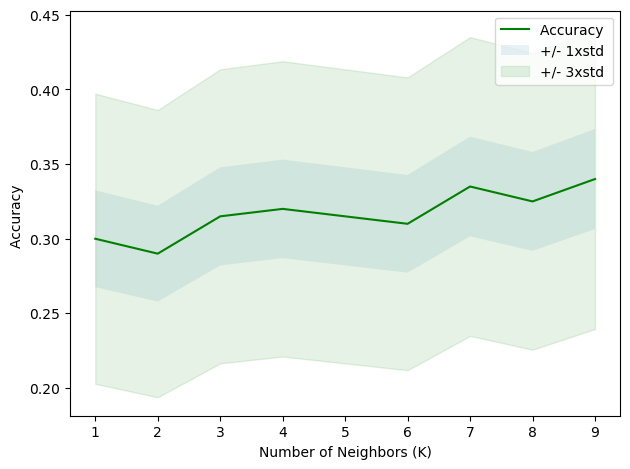

In [22]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [23]:
print( "The best accuracy was", mean_acc.max(), "with k =", mean_acc.argmax()+1) 

The best accuracy was 0.34 with k = 9


# Authors' rights
Machine Learning with Python course by IBM on Coursera: https://www.coursera.org/learn/machine-learning-with-python/

Completed and modified by Mathilde Marie Duville as part of the IBM Artificial Intelligence Engineering Professional Certificate and corresponding IBM badges. Please, follow the subsequent links to confirm the accreditation:

https://www.coursera.org/account/accomplishments/professional-cert/KSLW773DAATP?utm_source=link&utm_medium=certificate&utm_content=cert_image&utm_campaign=sharing_cta&utm_product=prof

https://www.credly.com/users/mathilde-marie-duville/badges

------------------------------------------------------------------------------------------------------------------------------------------------------

Author: Saeed Aghabozorgi

Other Contributors: Joseph Santarcangelo

Change Log

Date (YYYY-MM-DD)	Version	Changed By	Change Description

2021-01-21	2.4	Lakshmi	Updated sklearn library

2020-11-20	2.3	Lakshmi	Removed unused imports

2020-11-17	2.2	Lakshmi	Changed plot function of KNN

2020-11-03	2.1	Lakshmi	Changed URL of csv

2020-08-27	2.0	Lavanya	Moved lab to course repo in GitLab

© IBM Corporation 2020. All rights reserved.